In [60]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df =  pd.read_parquet("all_teams_last10seasons_with_opponent_rolls.parquet")

In [61]:
df.columns

Index(['Team_ID', 'Game_ID', 'GAME_DATE', 'TARGET_WL', 'HOME',
       'TEAM_LAST10_WINS', 'FGA_rolling5', 'FG_PCT_rolling5', 'FG3A_rolling5',
       'FG3_PCT_rolling5', 'FTA_rolling5', 'FT_PCT_rolling5', 'OREB_rolling5',
       'DREB_rolling5', 'AST_rolling5', 'STL_rolling5', 'BLK_rolling5',
       'TOV_rolling5', 'PF_rolling5', 'PTS_rolling5', 'Team_ID_opp',
       'TEAM_LAST10_WINS_opp', 'FGA_rolling5_opp', 'FG_PCT_rolling5_opp',
       'FG3A_rolling5_opp', 'FG3_PCT_rolling5_opp', 'FTA_rolling5_opp',
       'FT_PCT_rolling5_opp', 'OREB_rolling5_opp', 'DREB_rolling5_opp',
       'AST_rolling5_opp', 'STL_rolling5_opp', 'BLK_rolling5_opp',
       'TOV_rolling5_opp', 'PF_rolling5_opp', 'PTS_rolling5_opp'],
      dtype='object')

In [62]:
target = 'TARGET_WL'
features = [col for col in df.columns if col not in ['TEAM_ID', 'Game_ID', 'GAME_DATE', 'OPP_TEAM', target]]

In [63]:
df_model = df.dropna(subset=features + [target])

# Split chronologically (e.g., 80% train, 20% test)
split_idx = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_idx]
test_df = df_model.iloc[split_idx:]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [82]:
test_df

,Team_ID,Game_ID,GAME_DATE,TARGET_WL,HOME,TEAM_LAST10_WINS,FGA_rolling5,FG_PCT_rolling5,FG3A_rolling5,FG3_PCT_rolling5,...,FTA_rolling5_opp,FT_PCT_rolling5_opp,OREB_rolling5_opp,DREB_rolling5_opp,AST_rolling5_opp,STL_rolling5_opp,BLK_rolling5_opp,TOV_rolling5_opp,PF_rolling5_opp,PTS_rolling5_opp
7931,1610612761,0022100020,2021-10-22,1,0,0.0,97.00,0.309000,34.000000,0.20600,...,23.000000,0.739000,15.000000,41.000000,34.000000,13.00,9.000000,18.000000,24.000000,134.000000
7932,1610612761,0022100029,2021-10-23,0,1,1.0,98.50,0.364500,34.500000,0.24600,...,13.000000,0.923000,10.000000,40.000000,16.000000,7.00,3.000000,15.000000,21.000000,87.000000
7933,1610612761,0022100046,2021-10-25,0,1,1.0,94.00,0.376333,35.333333,0.26300,...,19.666667,0.836333,7.666667,37.666667,24.666667,10.00,7.666667,14.333333,16.666667,106.333333
7934,1610612761,0022100058,2021-10-27,1,1,1.0,91.25,0.402750,34.000000,0.29725,...,20.500000,0.817250,10.250000,38.500000,24.500000,5.75,5.500000,15.750000,22.000000,116.750000
7935,1610612761,0022100071,2021-10-29,1,1,2.0,93.00,0.414200,33.200000,0.33120,...,20.800000,0.763200,9.200000,34.600000,21.200000,6.20,4.200000,16.200000,21.200000,100.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,1610612766,0022401174,2025-04-11,0,0,1.0,81.80,0.460400,32.400000,0.30320,...,15.000000,0.795400,14.400000,32.600000,26.200000,4.60,4.800000,12.600000,13.400000,109.000000
9910,1610612766,0022401187,2025-04-13,0,0,1.0,84.80,0.432600,35.600000,0.29480,...,14.200000,0.782800,12.600000,36.200000,28.400000,5.80,5.200000,12.000000,12.200000,114.400000
9911,1610612766,0022500080,2025-10-22,1,1,1.0,85.20,0.428200,36.400000,0.30540,...,23.000000,0.747600,9.200000,32.800000,26.200000,7.60,3.200000,16.600000,22.800000,106.600000
9912,1610612766,0022500102,2025-10-25,0,0,2.0,86.20,0.438400,37.600000,0.34640,...,25.800000,0.768200,13.200000,33.400000,22.400000,6.60,5.600000,14.200000,17.800000,111.200000


In [64]:
corr = X_train.corr()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Show pairs with correlation > 0.9 (highly correlated)
high_corr = [(col, row, upper.loc[row, col]) 
             for col in upper.columns 
             for row in upper.index 
             if pd.notnull(upper.loc[row, col]) and abs(upper.loc[row, col]) > 0.7]

high_corr

[('PTS_rolling5', 'FG_PCT_rolling5', np.float64(0.7335629433815909)),
 ('PTS_rolling5_opp', 'FG_PCT_rolling5_opp', np.float64(0.7401542010741595))]

## Baseline Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import statsmodels.api as sm
import numpy as np

# Add constant (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit logistic regression
model = sm.Logit(y_train, X_train_sm).fit()

# Predict probabilities (not classes yet)
y_proba = model.predict(X_test_sm)

# Convert probabilities to class predictions (threshold = 0.5)
y_pred_log = (y_proba >= 0.5).astype(int)

print("\nAIC:", model.aic.round(2))
print("BIC:", model.bic.round(2))
print("\nAccuracy:", round(accuracy_score(y_test, y_pred_log),2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


         Current function value: 0.654759
         Iterations: 35

AIC: 10453.79
BIC: 10691.06

Accuracy: 0.62

Confusion Matrix:
 [[753 453]
 [303 474]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67      1206
           1       0.51      0.61      0.56       777

    accuracy                           0.62      1983
   macro avg       0.61      0.62      0.61      1983
weighted avg       0.63      0.62      0.62      1983



/Users/joshuademontigny/Downloads/ML_NBA_Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Baseline SVM

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# --- SVM ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== SVM ===
Accuracy: 0.6434694906707009
Confusion Matrix:
 [[938 268]
 [439 338]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1206
           1       0.56      0.44      0.49       777

    accuracy                           0.64      1983
   macro avg       0.62      0.61      0.61      1983
weighted avg       0.63      0.64      0.63      1983



## Baseline Random Forrest 

In [69]:
# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.62
Confusion Matrix:
 [[796 410]
 [344 433]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1206
           1       0.51      0.56      0.53       777

    accuracy                           0.62      1983
   macro avg       0.61      0.61      0.61      1983
weighted avg       0.63      0.62      0.62      1983



In [70]:
import os
# --- Ensure output folder exists ---
output_folder = "tables"
os.makedirs(output_folder, exist_ok=True)

# --- Collect all model metrics ---
results = []

# Logistic Regression
results.append({
    "model": "Logistic Regression",
    "accuracy": round(accuracy_score(y_test, y_pred_log), 2),
    "precision": round(precision_score(y_test, y_pred_log, average='macro'), 2),
    "recall": round(recall_score(y_test, y_pred_log, average='macro'), 2),
    "f1_score": round(f1_score(y_test, y_pred_log, average='macro'), 2)
})

# SVM
results.append({
    "model": "SVM",
    "accuracy": round(accuracy_score(y_test, y_pred_svm), 2),
    "precision": round(precision_score(y_test, y_pred_svm, average='macro'), 2),
    "recall": round(recall_score(y_test, y_pred_svm, average='macro'), 2),
    "f1_score": round(f1_score(y_test, y_pred_svm, average='macro'), 2)
})

# Random Forest
results.append({
    "model": "Random Forest",
    "accuracy": round(accuracy_score(y_test, y_pred_rf), 2),
    "precision": round(precision_score(y_test, y_pred_rf, average='macro'), 2),
    "recall": round(recall_score(y_test, y_pred_rf, average='macro'), 2),
    "f1_score": round(f1_score(y_test, y_pred_rf, average='macro'), 2)
})

# --- Convert to DataFrame and save ---
comparison_table = pd.DataFrame(results)
comparison_table.to_csv(os.path.join(output_folder, "model_comparison.csv"), index=False)

print("✅ Model comparison table saved to tables/model_comparison.csv")
print(comparison_table)


✅ Model comparison table saved to tables/model_comparison.csv
                 model  accuracy  precision  recall  f1_score
0  Logistic Regression      0.62       0.61    0.62      0.61
1                  SVM      0.64       0.62    0.61      0.61
2        Random Forest      0.62       0.61    0.61      0.61


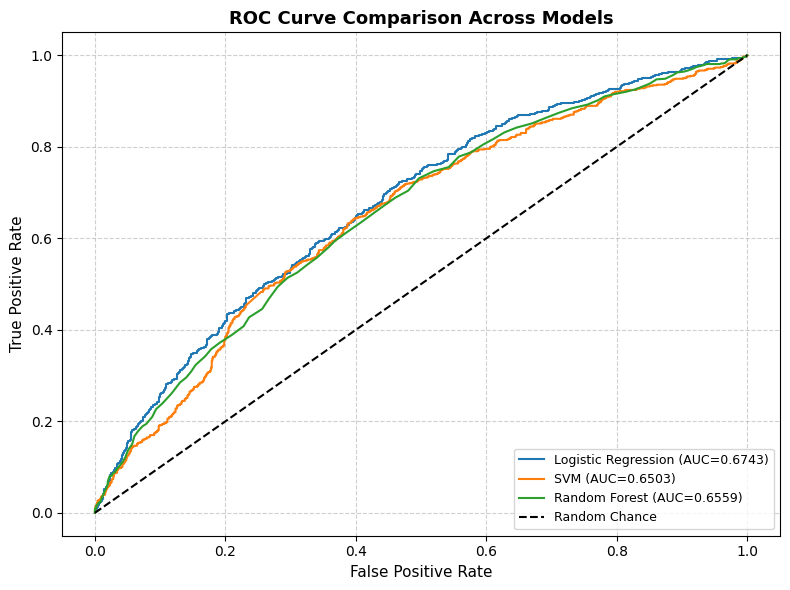

✅ ROC curve saved to tables/roc_curve.png


In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(8,6))

# Logistic Regression
y_proba_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log, pos_label=1)
auc_log = roc_auc_score(y_test, y_proba_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={auc_log:.4f})")

# SVM (with probability=True)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]   # use scaled data!
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm, pos_label=1)
auc_svm = roc_auc_score(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={auc_svm:.4f})")

# Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf, pos_label=1)
auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.4f})")

# --- Plot formatting ---
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate", fontsize=11)
plt.ylabel("True Positive Rate", fontsize=11)
plt.title("ROC Curve Comparison Across Models", fontsize=13, fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Save figure ---
roc_path = os.path.join(output_folder, "roc_curve.png")
plt.tight_layout()
plt.savefig(roc_path, dpi=300)
plt.show()

print(f"✅ ROC curve saved to {roc_path}")


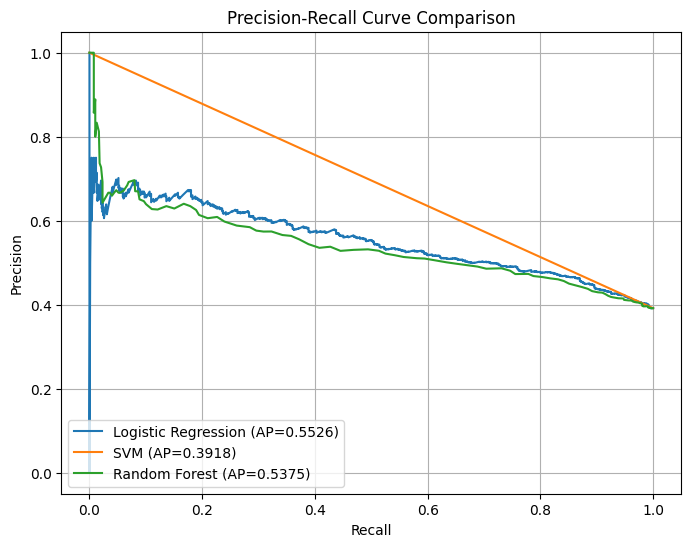

✅ Precision-Recall curve saved to tables/precision_recall_curve.png


In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# --- Precision-Recall Curve ---
plt.figure(figsize=(8,6))

# Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, y_proba_log)
ap_log = average_precision_score(y_test, y_proba_log)
plt.plot(recall, precision, label=f"Logistic Regression (AP={ap_log:.4f})")

# SVM
precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)
ap_svm = average_precision_score(y_test, y_proba_svm)
plt.plot(recall, precision, label=f"SVM (AP={ap_svm:.4f})")

# Random Forest
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
ap_rf = average_precision_score(y_test, y_proba_rf)
plt.plot(recall, precision, label=f"Random Forest (AP={ap_rf:.4f})")

# Plot settings
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)

# --- Save figure ---
pr_path = os.path.join(output_folder, "precision_recall_curve.png")
plt.savefig(pr_path, dpi=300)
plt.show()
print(f"✅ Precision-Recall curve saved to {pr_path}")


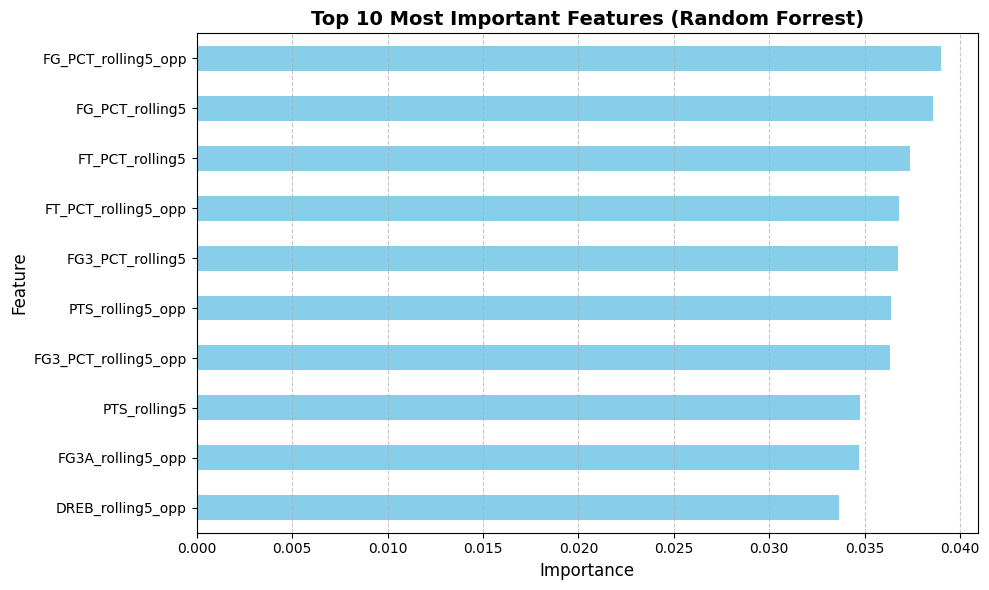

In [93]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# --- Fit Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --- Compute Feature Importances ---
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)  # ascending so top features appear at top

# --- Select Top 10 Features ---
top10 = importances.tail(10)  # last 10 = highest importance after ascending sort

# --- Plot ---
plt.figure(figsize=(10,6))
top10.plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Important Features (Random Forrest)", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/Users/joshuademontigny/Downloads/ML_NBA_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


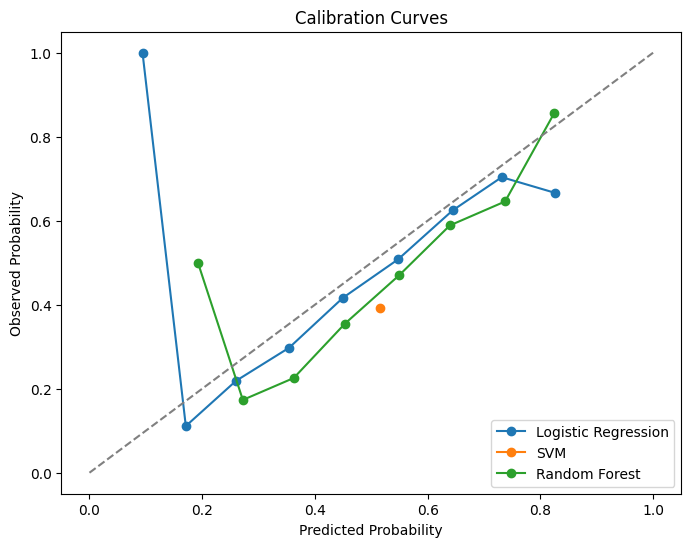

In [75]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_model,  # your fitted model
    "SVM": svm_model,
    "Random Forest": rf_model
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    if name == "SVM":
        # SVM may need probability=True when fitting
        y_prob = model.decision_function(X_test)  # or predict_proba[:,1] if probability=True
        y_prob = 1 / (1 + np.exp(-y_prob))  # sigmoid to convert decision function to probability
    else:
        y_prob = model.predict_proba(X_test)[:, 1]

    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.plot([0,1], [0,1], linestyle='--', color='gray')  # perfect calibration line
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Probability")
plt.title("Calibration Curves")
plt.legend()
plt.show()

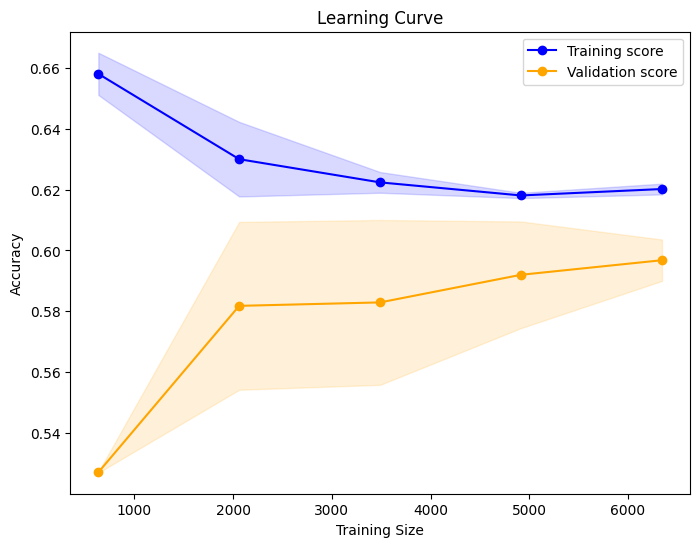

In [76]:
from sklearn.model_selection import learning_curve
import numpy as np

model = log_model  # pick any model
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Validation score')
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.15, color='orange')

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

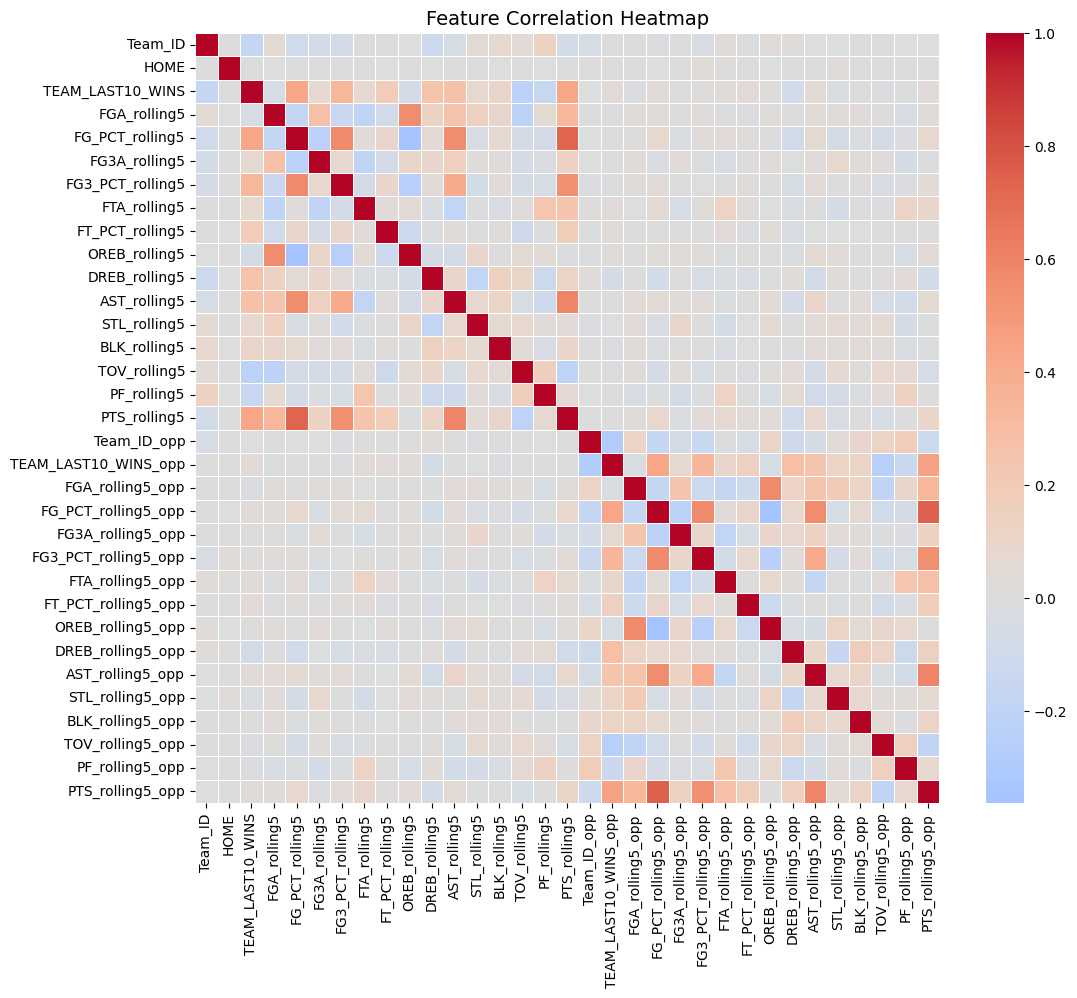

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=False,  # set to True if you want numeric values
    fmt=".2f",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


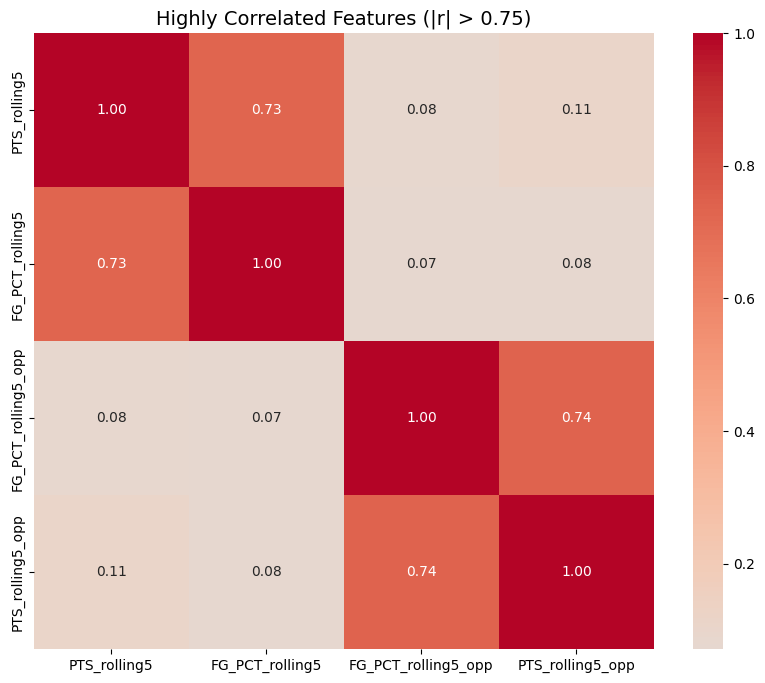

In [96]:
# Get unique features involved in high correlations
high_corr_features = list(set([col for col, row, val in high_corr] + [row for col, row, val in high_corr]))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr.loc[high_corr_features, high_corr_features],
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f"
)
plt.title("Highly Correlated Features (|r| > 0.75)", fontsize=14)
plt.show()
